## We consider a sinusoidal transverse periodic external field

Trial: Bessel function type of root

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, yn, jn_zeros, yn_zeros, iv, kv
from scipy.special import spherical_jn, spherical_yn

# Set up plotting parameters
plt.rcParams.update({"figure.figsize": (12, 8), "text.usetex": True, "font.size": 12})

print("=== BESSEL FUNCTION ZEROS (First 10) ===")
print("\n1. J_0(x) zeros (most important for freezing):")
j0_zeros = jn_zeros(0, 10)
print("   ", j0_zeros)
print("   First few: 2.405, 5.520, 8.654, 11.792, ...")

print("\n2. J_1(x) zeros:")
j1_zeros = jn_zeros(1, 10) 
print("   ", j1_zeros)

print("\n3. J_2(x) zeros:")
j2_zeros = jn_zeros(2, 10)
print("   ", j2_zeros)

print("\n=== FREEZING CONDITIONS ===")
omega = 20  # Example drive frequency
print(f"For ω = {omega}:")
print("Freezing occurs when J_0(2g_0/ω) = 0")
print("Critical g_0 values:")
critical_g0 = j0_zeros * omega / 2
for i, g0 in enumerate(critical_g0[:5]):
    print(f"   g_0^({i+1}) = {g0:.3f}")

print(f"\n=== BESSEL FUNCTION VALUES ===")
x_test = [1, 2, 5, 10]
for x in x_test:
    print(f"At x = {x}:")
    print(f"   J_0({x}) = {jn(0, x):.6f}")
    print(f"   J_1({x}) = {jn(1, x):.6f}")
    print(f"   Y_0({x}) = {yn(0, x):.6f}")
    print(f"   I_0({x}) = {iv(0, x):.6f}")
    print(f"   K_0({x}) = {kv(0, x):.6f}")
    print()

In [ ]:
# Plot various Bessel functions
x = np.linspace(0, 20, 1000)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# 1. Bessel functions of the first kind J_n(x)
ax1.plot(x, jn(0, x), 'b-', linewidth=2, label='$J_0(x)$')
ax1.plot(x, jn(1, x), 'r-', linewidth=2, label='$J_1(x)$') 
ax1.plot(x, jn(2, x), 'g-', linewidth=2, label='$J_2(x)$')
ax1.plot(x, jn(3, x), 'm-', linewidth=2, label='$J_3(x)$')

# Mark zeros of J_0
j0_zeros_plot = jn_zeros(0, 6)
ax1.scatter(j0_zeros_plot, np.zeros_like(j0_zeros_plot), 
           color='blue', s=50, zorder=5, label='$J_0$ zeros')

ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax1.set_xlabel('x')
ax1.set_ylabel('$J_n(x)$')
ax1.set_title('Bessel Functions of the First Kind')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.5, 1.1)

# 2. Bessel functions of the second kind Y_n(x)
x_y = np.linspace(0.1, 20, 1000)  # Avoid x=0 where Y_n diverges
ax2.plot(x_y, yn(0, x_y), 'b-', linewidth=2, label='$Y_0(x)$')
ax2.plot(x_y, yn(1, x_y), 'r-', linewidth=2, label='$Y_1(x)$')
ax2.plot(x_y, yn(2, x_y), 'g-', linewidth=2, label='$Y_2(x)$')

ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('x') 
ax2.set_ylabel('$Y_n(x)$')
ax2.set_title('Bessel Functions of the Second Kind')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-1, 1)

# 3. Modified Bessel functions of the first kind I_n(x)
x_mod = np.linspace(0, 5, 1000)
ax3.plot(x_mod, iv(0, x_mod), 'b-', linewidth=2, label='$I_0(x)$')
ax3.plot(x_mod, iv(1, x_mod), 'r-', linewidth=2, label='$I_1(x)$')
ax3.plot(x_mod, iv(2, x_mod), 'g-', linewidth=2, label='$I_2(x)$')

ax3.set_xlabel('x')
ax3.set_ylabel('$I_n(x)$')
ax3.set_title('Modified Bessel Functions of the First Kind')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')

# 4. Modified Bessel functions of the second kind K_n(x)
ax4.plot(x_mod[1:], kv(0, x_mod[1:]), 'b-', linewidth=2, label='$K_0(x)$')
ax4.plot(x_mod[1:], kv(1, x_mod[1:]), 'r-', linewidth=2, label='$K_1(x)$')
ax4.plot(x_mod[1:], kv(2, x_mod[1:]), 'g-', linewidth=2, label='$K_2(x)$')

ax4.set_xlabel('x')
ax4.set_ylabel('$K_n(x)$')
ax4.set_title('Modified Bessel Functions of the Second Kind')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

plt.tight_layout()
plt.show()

print("=== PHYSICAL INTERPRETATION ===")
print("• J_0 zeros → Complete suppression of dynamics (freezing points)")
print("• J_n oscillations → Periodic modulation of coupling strength") 
print("• I_n exponential growth → Instabilities in driven systems")
print("• K_n exponential decay → Tunneling suppression")

## Complete List of Bessel Functions and Applications

### **1. Standard Bessel Functions**

| Function | Symbol | Domain | Key Properties |
|----------|--------|--------|----------------|
| **Bessel of 1st Kind** | $J_n(x)$ | All real $x$ | Finite at $x=0$, oscillatory |
| **Bessel of 2nd Kind** | $Y_n(x)$ | $x > 0$ | Diverges at $x=0$, oscillatory |
| **Modified Bessel 1st** | $I_n(x)$ | All real $x$ | Exponential growth |
| **Modified Bessel 2nd** | $K_n(x)$ | $x > 0$ | Exponential decay |

### **2. Specialized Bessel Functions**

| Function | Symbol | Physics Application |
|----------|--------|-------------------|
| **Spherical Bessel 1st** | $j_n(x)$ | Spherical waves, atomic physics |
| **Spherical Bessel 2nd** | $y_n(x)$ | Outgoing spherical waves |
| **Hankel Functions** | $H_n^{(1,2)}(x)$ | Wave propagation |
| **Airy Functions** | $\text{Ai}(x), \text{Bi}(x)$ | WKB approximation |

### **3. Critical Zeros for Quantum Freezing**

Your code uses `jn_zeros(0, 4)` to find freezing points where $J_0(2g_0/\omega) = 0$:

- **First zero**: $x_1 ≈ 2.405$ → $g_0^{(1)} = 2.405 \omega/2$
- **Second zero**: $x_2 ≈ 5.520$ → $g_0^{(2)} = 5.520 \omega/2$  
- **Third zero**: $x_3 ≈ 8.654$ → $g_0^{(3)} = 8.654 \omega/2$
- **Fourth zero**: $x_4 ≈ 11.792$ → $g_0^{(4)} = 11.792 \omega/2$

### **4. Python Functions in `scipy.special`**

```python
from scipy.special import (
    jn, yn,           # Standard Bessel functions
    jn_zeros, yn_zeros,  # Zeros of Bessel functions
    iv, kv,           # Modified Bessel functions  
    spherical_jn, spherical_yn,  # Spherical Bessel functions
    hankel1, hankel2,  # Hankel functions
    airy              # Airy functions
)
```

In [3]:
from qutip import *
import numpy as np
from itertools import combinations
from scipy.special import jn_zeros

# helper: operator at one site
def spin_only_op(op, site, N):
    ops = [qeye(2) for _ in range(N)]
    ops[site] = op
    return tensor(*ops)

def g_t(t, args):
    g0 = args['g0']
    w = args['omega']
    return g0 * np.sin(w * t)

def gdot_t(t, args):
    g0 = args['g0']
    w = args['omega']
    return g0 * w * np.cos(w * t)

def coeff(t, args):
    return (g_t(t, args) - gdot_t(t, args)) / np.sqrt(N)


def j_ij(Jvalue, i,j, beta):
    return Jvalue/(np.abs(i-j))**beta

def h0_ham(N, beta, Jvalue):
    sx,sy,sz = sigmax(), sigmay(), sigmaz()
    empt = qzero(2**N) + 1j * qzero(2**N)    
    H0  =  empt
    
    comb = combinations(np.arange(N), 2)
    for nm in list(comb):
        i,j= np.array(nm)
        id = qeye(2**i)
        dim11 = j-i-1
        id1 = qeye(2**dim11)
        dim12 = N-1-j
        id2 = qeye(2**dim12)
        H0 = H0 + Qobj(tensor(id, tensor(sz, tensor(id1, tensor(sz,id2)))).full()) * j_ij(Jvalue, i,j, beta)

    return H0

print("Function defined !")

Function defined !


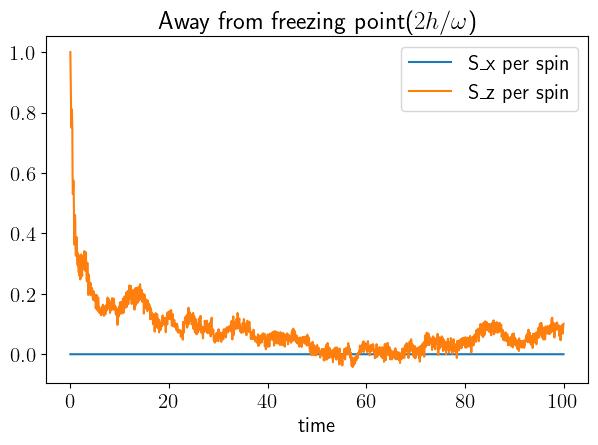

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import tensor, qeye, destroy, basis, sigmax, sesolve
from scipy.special import jn_zeros

plt.rcParams.update({"figure.figsize": (7, 4.5), "text.usetex": True, "font.size": 15})

# -------------------------------
# parameters
N = 6           # number of spins
n_ph = 25       # photon cutoff
hbar = 1.0

beta = float('inf')
Jvalue = 1
omega = 20
g0 = 3.5 * omega / 2

# time
ttop = 100

# photon operators
a = destroy(n_ph)
adag = a.dag()
I_ph = qeye(n_ph)

H0 = h0_ham(N, beta, Jvalue)
H0 = tensor(H0, qeye(n_ph)) + hbar * omega * tensor(qeye(2**N), adag*a)

# spin identity (N qubits)
I_spin_full = tensor(*[qeye(2) for _ in range(N)])

# collective Sx
Sx_spin = 0.5 * sum(spin_only_op(sigmax(), i, N) for i in range(N))

# full operator (a+a†) ⊗ Sx
V = tensor(a + adag, Sx_spin)

H0 = Qobj(H0.full())
V = Qobj(V.full())

H = H0 + V
# time-dependence
'''
    Try to get an idea if there is true-freezing at some of the drive paramter

    J_0(2 g_0 /w) = 0
    
'''
# Hamiltonian list for sesolve
#H_td = [[H, coeff]]
H_td = [H0, [V, g_t]]

# -------------------------
# initial state: photon vacuum ⊗ all spins up
spin_up = tensor(*([basis(2, 0)] * N))
psi0 = tensor(basis(n_ph, 1), spin_up)

# observables: photon number, Sx
op_nph = tensor(adag*a, I_spin_full)
op_Sx  = tensor(I_ph, Sx_spin)
op_Sz = tensor(I_ph, sum(spin_only_op(sigmaz(), i, N) for i in range(N)))

# evolve
tlist = np.linspace(0, ttop,  ttop * 20 + 1)
opts = Options(nsteps=1e5)
args = {'omega': 10.0, 'g0': g0, 'opts':opts}
result = sesolve(H_td, psi0, tlist, e_ops=[op_nph, op_Sx, op_Sz], args=args)

# extract results
nph_t = np.real(result.expect[0]) / N
Sx_t  = np.real(result.expect[1]) / N
Sz_t  = np.real(result.expect[2]) / N

# plot
#plt.plot(tlist, nph_t, label='n_ph per spin')
plt.plot(tlist, Sx_t, label='S_x per spin')
plt.plot(tlist, Sz_t, label='S_z per spin')
plt.xlabel("time")
plt.legend()

plt.title(r"Away from freezing point($2h/\omega$)")
#plt.axhline(y =1, ls = '--', color = 'green')
plt.show()

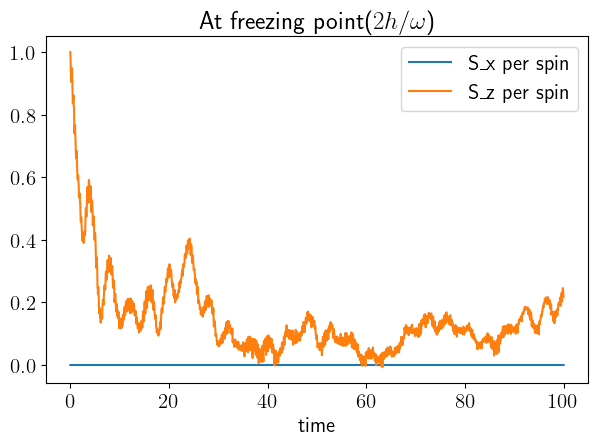

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import tensor, qeye, destroy, basis, sigmax, sesolve
from scipy.special import jn_zeros

plt.rcParams.update({"figure.figsize": (7, 4.5), "text.usetex": True, "font.size": 15})

# -------------------------------
# parameters
N = 6           # number of spins
n_ph = 25       # photon cutoff
hbar = 1.0

beta = float('inf')
Jvalue = 1
omega = 20
g0 = jn_zeros(0, 1)[0] * omega / 2

# time
ttop = 100

# photon operators
a = destroy(n_ph)
adag = a.dag()
I_ph = qeye(n_ph)

H0 = h0_ham(N, beta, Jvalue)
H0 = tensor(H0, qeye(n_ph)) + hbar * omega * tensor(qeye(2**N), adag*a)

# spin identity (N qubits)
I_spin_full = tensor(*[qeye(2) for _ in range(N)])

# collective Sx
Sx_spin = 0.5 * sum(spin_only_op(sigmax(), i, N) for i in range(N))

# full operator (a+a†) ⊗ Sx
V = tensor(a + adag, Sx_spin)

H0 = Qobj(H0.full())
V = Qobj(V.full())

H = H0 + V
# time-dependence
'''
    Try to get an idea if there is true-freezing at some of the drive paramter

    J_0(2 g_0 /w) = 0
    
'''
# Hamiltonian list for sesolve
#H_td = [[H, coeff]]
H_td = [H0, [V, g_t]]

# -------------------------
# initial state: photon vacuum ⊗ all spins up
spin_up = tensor(*([basis(2, 0)] * N))
psi0 = tensor(basis(n_ph, 1), spin_up)

# observables: photon number, Sx
op_nph = tensor(adag*a, I_spin_full)
op_Sx  = tensor(I_ph, Sx_spin)
op_Sz = tensor(I_ph, sum(spin_only_op(sigmaz(), i, N) for i in range(N)))

# evolve
tlist = np.linspace(0, ttop,  ttop * 20 + 1)
opts = Options(nsteps=1e5)
args = {'omega': 10.0, 'g0': g0, 'opts':opts}
result = sesolve(H_td, psi0, tlist, e_ops=[op_nph, op_Sx, op_Sz], args=args)

# extract results
nph_t = np.real(result.expect[0]) / N
Sx_t  = np.real(result.expect[1]) / N
Sz_t  = np.real(result.expect[2]) / N

# plot
#plt.plot(tlist, nph_t, label='n_ph per spin')
plt.plot(tlist, Sx_t, label='S_x per spin')
plt.plot(tlist, Sz_t, label='S_z per spin')
plt.xlabel("time")
plt.legend()

plt.title(r"At freezing point($2h/\omega$)")
#plt.axhline(y =1, ls = '--', color = 'green')
plt.show()

#### Lets plot 2h/w vs order-parameter

In [4]:
from qutip import *
import numpy as np
from itertools import combinations
from scipy.special import jn_zeros

# helper: operator at one site
def spin_only_op(op, site, N):
    ops = [qeye(2) for _ in range(N)]
    ops[site] = op
    return tensor(*ops)

def g_t(t, args):
    g0 = args['g0']
    w = args['omega']
    return g0 * np.sin(w * t)

def gdot_t(t, args):
    g0 = args['g0']
    w = args['omega']
    return g0 * w * np.cos(w * t)

def coeff(t, args):
    return (g_t(t, args) - gdot_t(t, args)) / np.sqrt(N)


def j_ij(Jvalue, i,j, beta):
    return Jvalue/(np.abs(i-j))**beta

def h0_ham(N, beta, Jvalue):
    sx,sy,sz = sigmax(), sigmay(), sigmaz()
    empt = qzero(2**N) + 1j * qzero(2**N)    
    H0  =  empt
    
    comb = combinations(np.arange(N), 2)
    for nm in list(comb):
        i,j= np.array(nm)
        id = qeye(2**i)
        dim11 = j-i-1
        id1 = qeye(2**dim11)
        dim12 = N-1-j
        id2 = qeye(2**dim12)
        H0 = H0 + Qobj(tensor(id, tensor(sz, tensor(id1, tensor(sz,id2)))).full()) * j_ij(Jvalue, i,j, beta)

    return H0

print("Function defined !")

Function defined !


100%|██████████| 50/50 [00:00<00:00, 37509.43it/s]



Dynamics done !


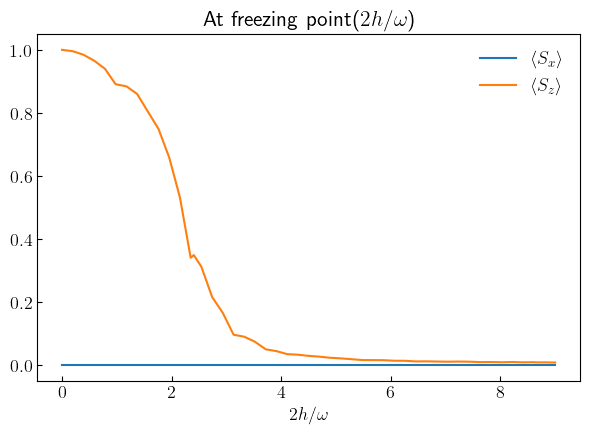

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import tensor, qeye, destroy, basis, sigmax, sesolve
from scipy.special import jn_zeros
from tqdm import tqdm
from multiprocessing import Pool


plt.rcParams.update({"figure.figsize": (7, 4.5), "text.usetex": True, "font.size": 13})

# -------------------------------
# parameters
N = 8      # number of spins
n_ph = 25       # photon cutoff
hbar = 1.0

beta = float('inf')
Jvalue = 1
omega = 20
g0s = omega / 2 * np.linspace(0, 9, 47)
g0s = np.sort(np.append(g0s, jn_zeros(0, 3) * omega / 2))

# time
ttop = 10

nprocs = 5
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

# photon operators
a = destroy(n_ph)
adag = a.dag()
I_ph = qeye(n_ph)

H0 = h0_ham(N, beta, Jvalue)
H0 = tensor(H0, qeye(n_ph)) + hbar * omega * tensor(qeye(2**N), adag*a)

# spin identity (N qubits)
I_spin_full = tensor(*[qeye(2) for _ in range(N)])

# collective Sx
Sx_spin = 0.5 * sum(spin_only_op(sigmax(), i, N) for i in range(N))

# full operator (a+a†) ⊗ Sx
V = tensor(a + adag, Sx_spin)

H0 = Qobj(H0.full())
V = Qobj(V.full())

H = H0 + V
# time-dependence
'''
    Try to get an idea if there is true-freezing at some of the drive paramter

    J_0(2 g_0 /w) = 0
    
'''
# Hamiltonian list for sesolve
#H_td = [[H, coeff]]
H_td = [H0, [V, g_t]]

# -------------------------
# initial state: photon vacuum ⊗ all spins up
spin_up = tensor(*([basis(2, 0)] * N))
psi0 = tensor(basis(n_ph, 1), spin_up)

# observables: photon number, Sx
op_nph = tensor(adag*a, I_spin_full)
op_Sx  = tensor(I_ph, Sx_spin)
op_Sz = tensor(I_ph, sum(spin_only_op(sigmaz(), i, N) for i in range(N)))

# evolve
tlist = np.linspace(0, ttop,  ttop * 20 + 1)

args = [{'omega': omega, 'g0': g0, 'opts':opts, 'tlist': tlist} for g0 in g0s]

def run_dynamics(args):
    result = sesolve(H_td, psi0, tlist, e_ops=[op_nph, op_Sx, op_Sz], args=args)    
    op_nph_avg = np.average(np.real(result.expect[0])) / N
    op_Sx_avg = np.average(np.real(result.expect[1])) / N
    op_Sz_avg = np.average(np.real(result.expect[2])) / N
    return op_nph_avg, op_Sx_avg, op_Sz_avg
    #return result

results = p.map(run_dynamics, tqdm(args))

print("Dynamics done !")

# convert list of tuples to ndarray, then take first column (n_ph averages)
nph_t_avg = np.array(results)[:, 0]
Sx_t_avg = np.array(results)[:, 1]
Sz_t_avg = np.array(results)[:, 2]

# plot
#plt.plot(2 * g0s/omega, nph_t_avg, label='n_ph per spin')
plt.plot(2 * g0s/omega, Sx_t_avg, label=r'$\langle S_x \rangle$')
plt.plot(2 * g0s/omega, Sz_t_avg, label=r'$\langle S_z \rangle$')
plt.xlabel(r"$2h/\omega$")
plt.legend(frameon=False)

plt.title(r"At freezing point($2h/\omega$)")
#plt.axhline(y =1, ls = '--', color = 'green')
plt.tick_params(which='both', axis="both", direction="in")

plt.show()

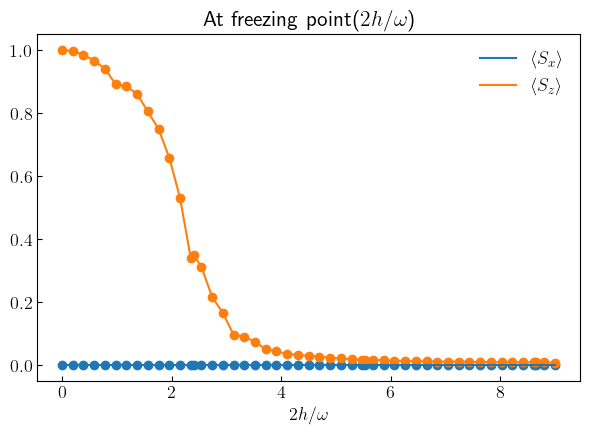

In [7]:
plt.rcParams.update({"figure.figsize": (7, 4.5), "text.usetex": True, "font.size": 13})

# plot
#plt.plot(2 * g0s/omega, nph_t_avg, label='n_ph per spin')
plt.plot(2 * g0s/omega, Sx_t_avg, label=r'$\langle S_x \rangle$')
plt.scatter(2 * g0s/omega, Sx_t_avg)
plt.plot(2 * g0s/omega, Sz_t_avg, label=r'$\langle S_z \rangle$')
plt.scatter(2 * g0s/omega, Sz_t_avg)
plt.xlabel(r"$2h/\omega$")
plt.legend(frameon=False)

plt.title(r"At freezing point($2h/\omega$)")
#plt.axhline(y =1, ls = '--', color = 'green')
plt.tick_params(which='both', axis="both", direction="in")

plt.show()

Multiprocess code

Running for N- 3


100%|██████████| 50/50 [00:00<00:00, 38707.12it/s]


Dynamics done !
Running for N- 4


100%|██████████| 50/50 [00:00<00:00, 33267.01it/s]


Dynamics done !


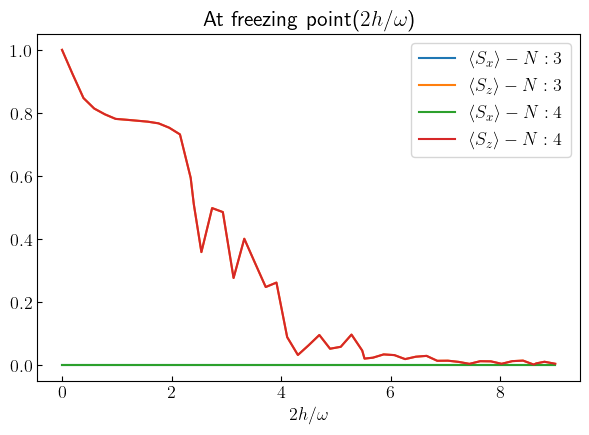

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import tensor, qeye, destroy, basis, sigmax, sesolve
from scipy.special import jn_zeros
from tqdm import tqdm
from multiprocessing import Pool


def run_dynamics(args):
    result = sesolve(H_td, psi0, tlist, e_ops=[op_nph, op_Sx, op_Sz], args=args)    
    op_nph_avg = np.average(np.real(result.expect[0])) / N
    op_Sx_avg = np.average(np.real(result.expect[1])) / N
    op_Sz_avg = np.average(np.real(result.expect[2])) / N
    return op_nph_avg, op_Sx_avg, op_Sz_avg
    #return result

plt.rcParams.update({"figure.figsize": (7, 4.5), "text.usetex": True, "font.size": 13})

# -------------------------------
# parameters
Ns = [6,8]      # number of spins
n_ph = 25       # photon cutoff
hbar = 1.0

beta = float('inf')
Jvalue = 1
omega = 20
g0s = omega / 2 * np.linspace(0, 9, 47)
g0s = np.sort(np.append(g0s, jn_zeros(0, 3) * omega / 2))

# time
ttop = 100

nprocs = 5
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

# photon operators
a = destroy(n_ph)
adag = a.dag()
I_ph = qeye(n_ph)

for N in Ns:
    print("Running for N-", N)
    H0 = h0_ham(N, beta, Jvalue)
    H0 = tensor(H0, qeye(n_ph)) + hbar * omega * tensor(qeye(2**N), adag*a)

    # spin identity (N qubits)
    I_spin_full = tensor(*[qeye(2) for _ in range(N)])

    # collective Sx
    Sx_spin = 0.5 * sum(spin_only_op(sigmax(), i, N) for i in range(N))

    # full operator (a+a†) ⊗ Sx
    V = tensor(a + adag, Sx_spin)

    H0 = Qobj(H0.full())
    V = Qobj(V.full())

    H = H0 + V
    # time-dependence
    '''
        Try to get an idea if there is true-freezing at some of the drive paramter

        J_0(2 g_0 /w) = 0
        
    '''
    # Hamiltonian list for sesolve
    #H_td = [[H, coeff]]
    H_td = [H0, [V, g_t]]

    # -------------------------
    # initial state: photon vacuum ⊗ all spins up
    spin_up = tensor(*([basis(2, 0)] * N))
    psi0 = tensor(basis(n_ph, 1), spin_up)

    # observables: photon number, Sx
    op_nph = tensor(adag*a, I_spin_full)
    op_Sx  = tensor(I_ph, Sx_spin)
    op_Sz = tensor(I_ph, sum(spin_only_op(sigmaz(), i, N) for i in range(N)))

    # evolve
    tlist = np.linspace(0, ttop,  ttop * 20 + 1)

    args = [{'omega': omega, 'g0': g0, 'opts':opts, 'tlist': tlist} for g0 in g0s]

    results = p.map(run_dynamics, tqdm(args))

    print("Dynamics done !")

    # convert list of tuples to ndarray, then take first column (n_ph averages)
    nph_t_avg = np.array(results)[:, 0]
    Sx_t_avg = np.array(results)[:, 1]
    Sz_t_avg = np.array(results)[:, 2]

    # plot
    #plt.plot(2 * g0s/omega, nph_t_avg, label='n_ph per spin')
    plt.plot(2 * g0s/omega, Sx_t_avg, label=fr'$\langle S_x \rangle  - N:{N}$')
    plt.plot(2 * g0s/omega, Sz_t_avg, label=fr'$\langle S_z \rangle  - N:{N}$')
    plt.xlabel(r"$2h/\omega$")
    plt.legend(frameon=False)

    plt.title(r"At freezing point($2h/\omega$)")
    #plt.axhline(y =1, ls = '--', color = 'green')
    plt.tick_params(which='both', axis="both", direction="in")


plt.legend()
plt.show()